In [1]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
  data = pd.read_csv("SPAM text message 20170820 - Data.csv")

In [3]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [5]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
data shape:  (5572, 500)


In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 8s 107ms/step - loss: 0.3548 - acc: 0.8766 - val_loss: 0.2556 - val_acc: 0.9372
Epoch 2/10
60/60 [==============================] - 6s 106ms/step - loss: 0.1084 - acc: 0.9750 - val_loss: 0.0753 - val_acc: 0.9821
Epoch 3/10
60/60 [==============================] - 6s 107ms/step - loss: 0.0522 - acc: 0.9888 - val_loss: 0.0483 - val_acc: 0.9865
Epoch 4/10
60/60 [==============================] - 6s 97ms/step - loss: 0.1627 - acc: 0.9332 - val_loss: 0.1412 - val_acc: 0.9473
Epoch 5/10
60/60 [==============================] - 6s 98ms/step - loss: 0.1225 - acc: 0.9540 - val_loss: 0.1464 - val_acc: 0.9484
Epoch 6/10
60/60 [==============================] - 6s 99ms/step - loss: 0.0532 - acc: 0.9843 - val_loss: 0.0855 - val_acc: 0.9697
Epoch 7/10
60/60 [==============================] - 6s 100ms/step - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0812 - val_acc: 0.9765
Epoch 8/10
60/60 [==============================] - 6s 101ms/step - loss: 0.015

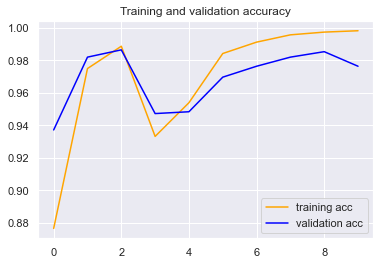

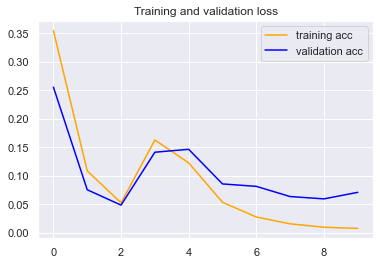

In [7]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
predict_x = model.predict(texts_test) 
pred = np.argmax(predict_x,axis=1)
acc = model.evaluate(texts_test, y_test)
proba_rnn = np.argmax(model.predict(texts_test), axis=-1)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 1s 20ms/step
Test loss is 0.08 accuracy is 0.98  
[[961 154]
 [  0   0]]


In [12]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 14s 193ms/step - loss: 0.3087 - acc: 0.8797 - val_loss: 0.1555 - val_acc: 0.9507
Epoch 2/10
60/60 [==============================] - 11s 184ms/step - loss: 0.1105 - acc: 0.9762 - val_loss: 0.0905 - val_acc: 0.9742
Epoch 3/10
60/60 [==============================] - 12s 196ms/step - loss: 0.0705 - acc: 0.9877 - val_loss: 0.0652 - val_acc: 0.9821
Epoch 4/10
60/60 [==============================] - 12s 199ms/step - loss: 0.0484 - acc: 0.9877 - val_loss: 0.0471 - val_acc: 0.9910
Epoch 5/10
60/60 [==============================] - 12s 200ms/step - loss: 0.0295 - acc: 0.9938 - val_loss: 0.0422 - val_acc: 0.9865
Epoch 6/10
60/60 [==============================] - 12s 200ms/step - loss: 0.0223 - acc: 0.9938 - val_loss: 0.0467 - val_acc: 0.9843
Epoch 7/10
60/60 [==============================] - 12s 199ms/step - loss: 0.0143 - acc: 0.9969 - val_loss: 0.0566 - val_acc: 0.9765
Epoch 8/10
60/60 [==============================] - 12s 199ms/step - 

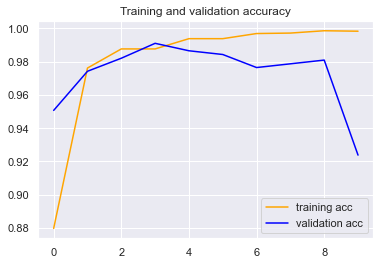

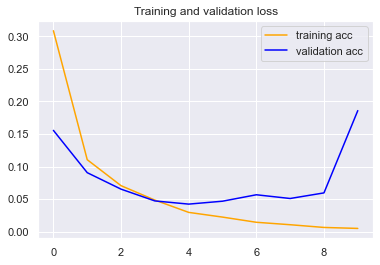

In [13]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
pred = np.argmax(model.predict(texts_test), axis=-1)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = np.argmax(model.predict(texts_test), axis=-1)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 2s 56ms/step
Test loss is 0.17 accuracy is 0.93  
[[961 154]
 [  0   0]]
